In [1]:
# 3. Implement Image classification using convolutional neural networks (CNNs) for multiclass
# classification.

In [4]:
# Importing the Necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [5]:
# loading cifar10 dataset :- 60,000 (32*32) , 10 classes
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [6]:
# normalizing values to bring between 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
model = models.Sequential()

In [8]:
# 1st Layer -- convolutional layer with 32 filters (3*3)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 2nd Layer -- convolutional layer with 64 filters (3*3)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [10]:
# Last Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [11]:
#  Flattern and Dense layer (fully connected layers)
model.add(layers.Flatten())                         # converts 2D feature maps into a 1D vector
model.add(layers.Dense(64, activation='relu'))      # fully connected (dense) layer with 64 neurons
model.add(layers.Dense(10))                         # Final layer with 10 neurons for each class in cifar


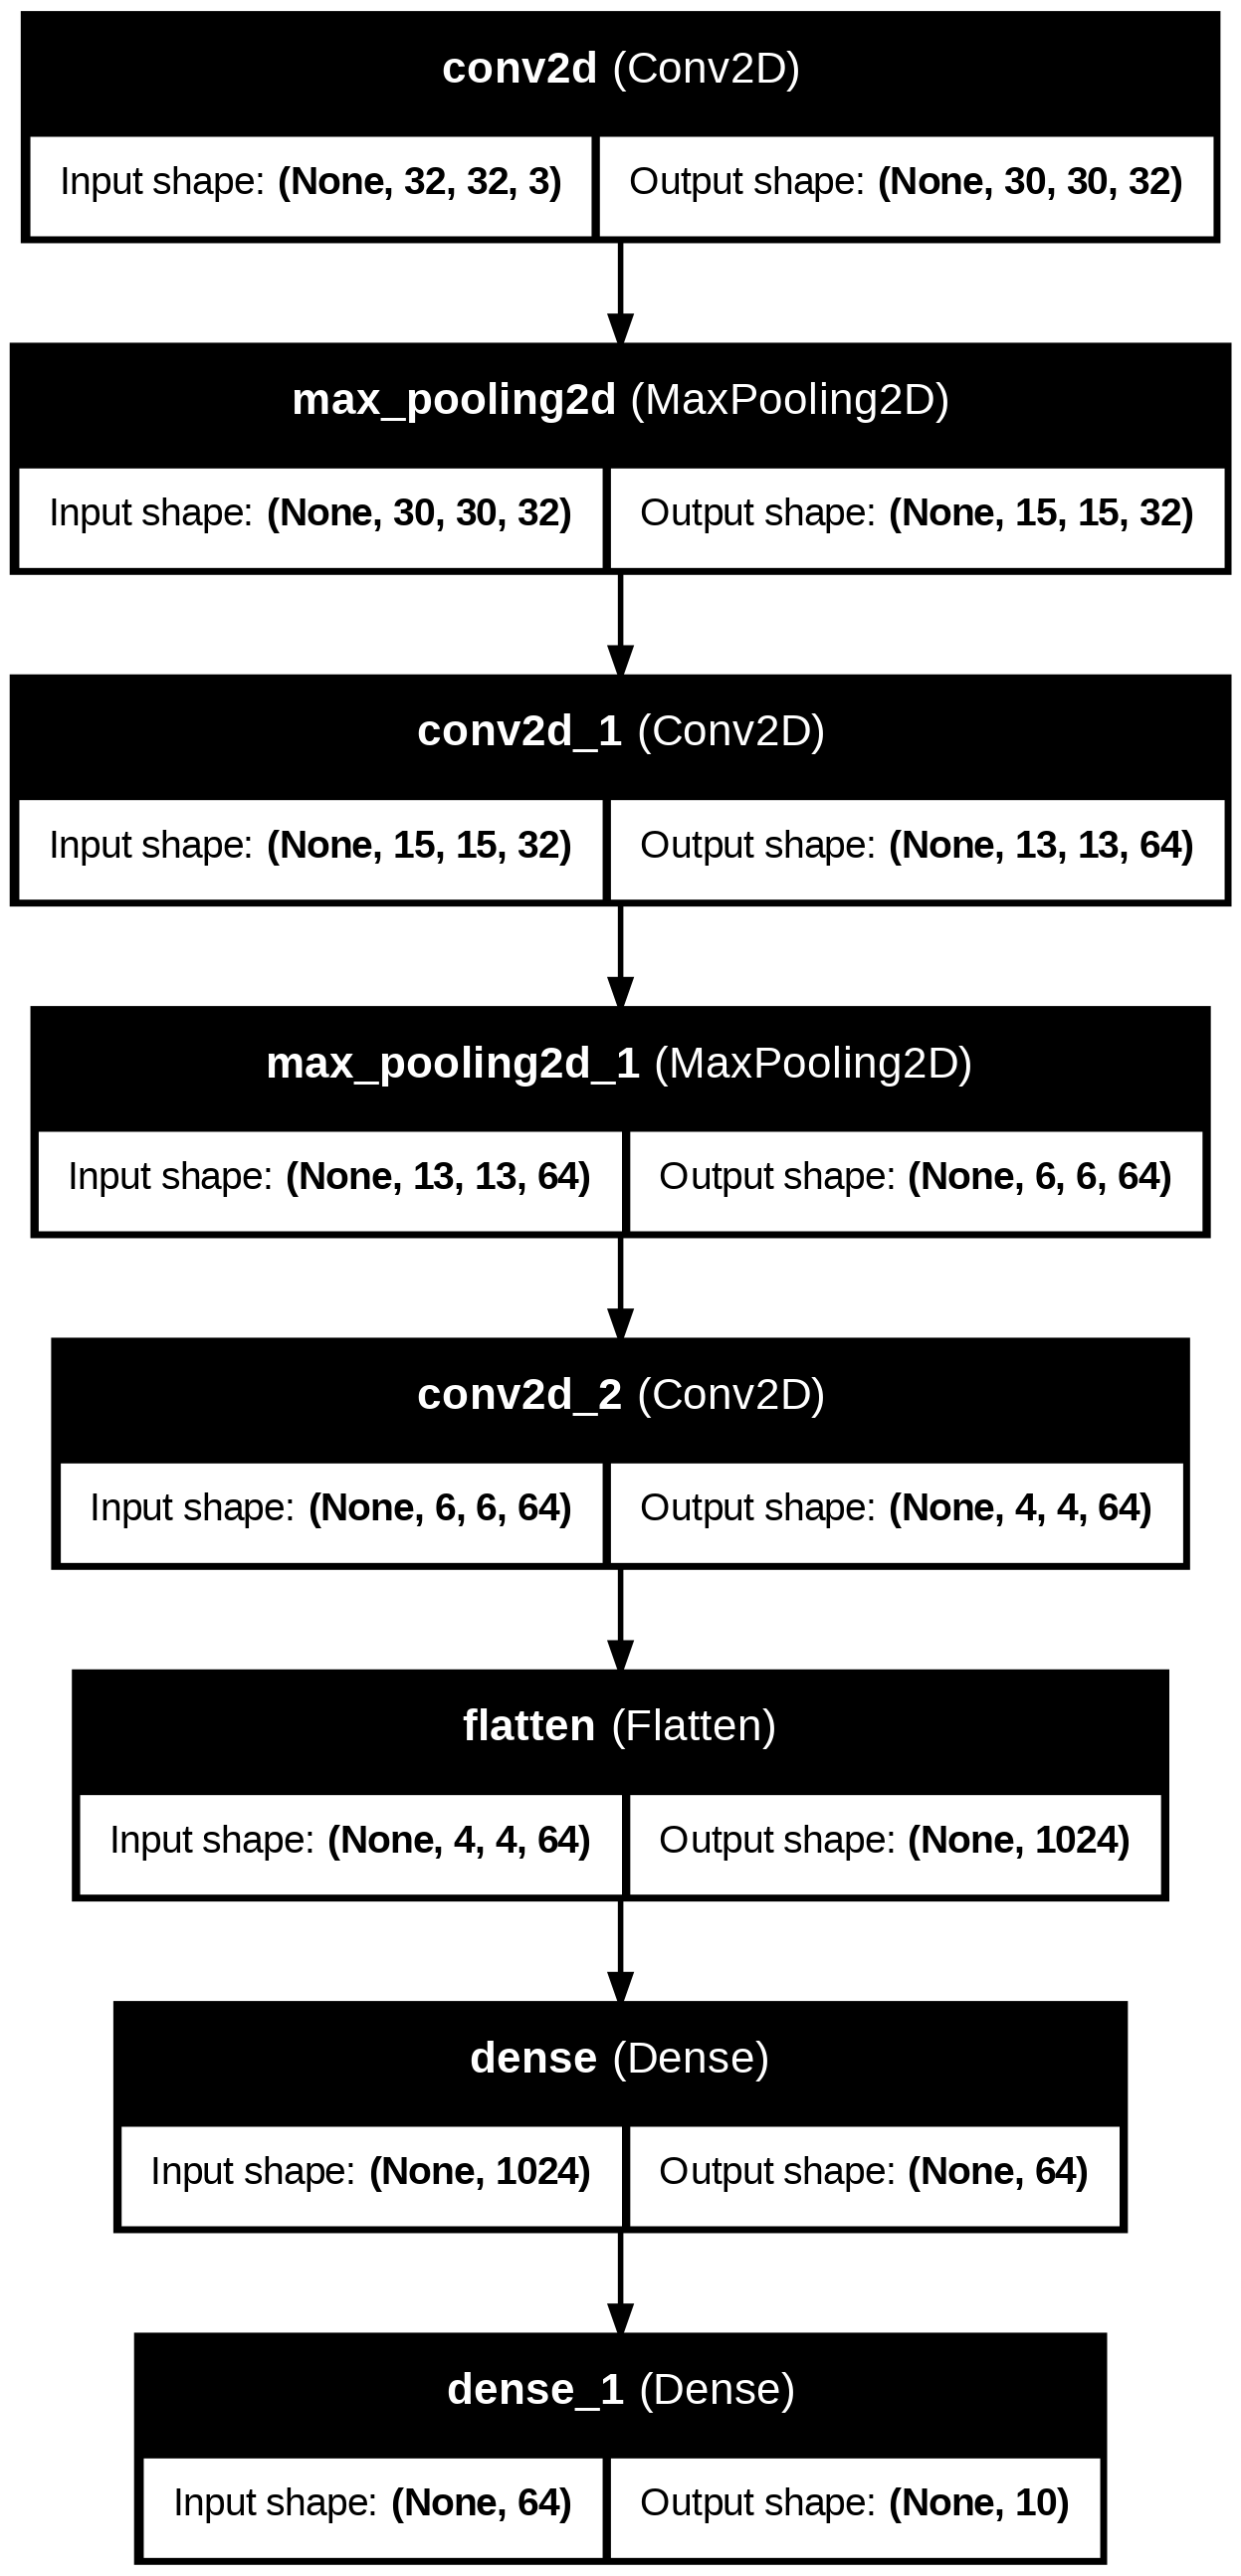

In [12]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


**{Output Size} = {Input Size} - {Kernel Size} + 1 / {Stride}**


**Kernel Size: 3 (as the filter is 3x3)**

**Stride: 1 (default stride)**


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     # used for multiclass classification problems
              metrics=['accuracy'])


In [14]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3583 - loss: 1.7513 - val_accuracy: 0.5259 - val_loss: 1.3079
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5712 - loss: 1.2064 - val_accuracy: 0.6098 - val_loss: 1.0943
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6357 - loss: 1.0294 - val_accuracy: 0.6474 - val_loss: 1.0037
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6758 - loss: 0.9156 - val_accuracy: 0.6735 - val_loss: 0.9415
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7079 - loss: 0.8405 - val_accuracy: 0.6918 - val_loss: 0.8840
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7290 - loss: 0.7723 - val_accuracy: 0.6985 - val_loss: 0.8627
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7470 - loss: 0.7196 - val_accuracy: 0.6896 - val_loss: 0.9043
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7657 - loss: 0.6709

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f'Test accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7052 - loss: 0.8761
Test accuracy: 0.6987
Test loss: 0.8948


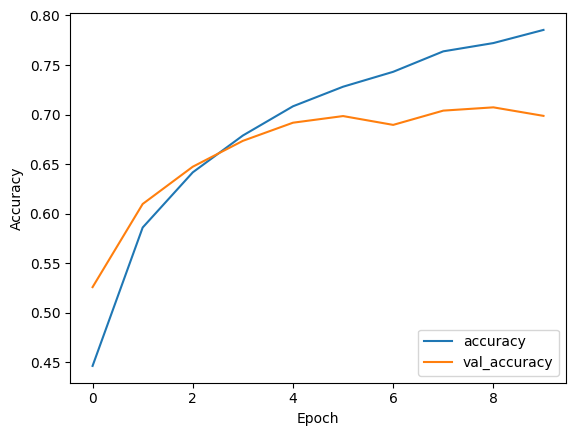

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [17]:
history.history['accuracy']

[0.446399986743927,
 0.5860400199890137,
 0.6417199969291687,
 0.678879976272583,
 0.7083600163459778,
 0.7281200289726257,
 0.7431600093841553,
 0.7638000249862671,
 0.772159993648529,
 0.7854200005531311]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step


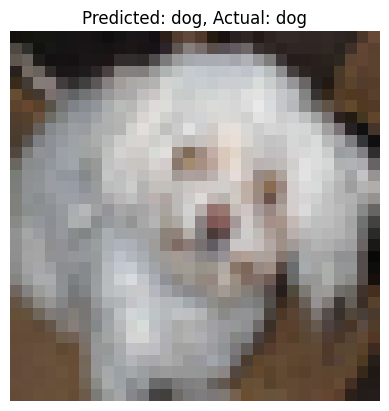

In [18]:
import numpy as np
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 1. Pick a test image (e.g., the first image in the test set)
test_image = test_images[1000]
test_label = test_labels[1000]

# 2. Add a batch dimension (model expects a batch of images)
test_image_batch = np.expand_dims(test_image, axis=0)

# 3. Make a prediction
predictions = model.predict(test_image_batch)
predicted_label = np.argmax(predictions[0])  # Get the index of the highest probability class

# 4. Display the image and the predicted label
plt.imshow(test_image)
plt.title(f'Predicted: {class_names[predicted_label]}, Actual: {class_names[test_label[0]]}')
plt.axis('off')  # Remove axis ticks
plt.show()